In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Reading data
url = 'https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab4/data.csv'
df = pd.read_csv(url)
df2 = pd.read_csv(url)
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Result
0,33,206,87,81,2,4,31.34
1,49,14,86,50,0,9,44.26
2,79,72,90,62,1,5,73.94
3,28,173,49,67,0,5,14.93
4,62,189,92,47,1,20,59.60


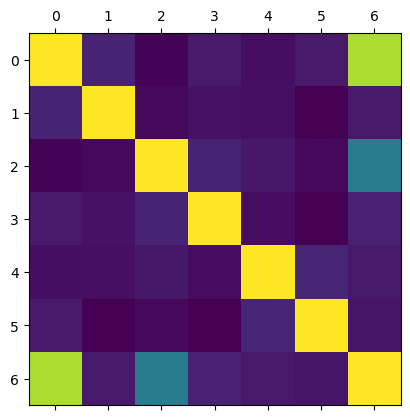

In [14]:
# Create a correlation matrix
corrMatrix = df.corr()
plt.matshow(corrMatrix)
plt.show()


<Axes: xlabel='Var1', ylabel='Result'>

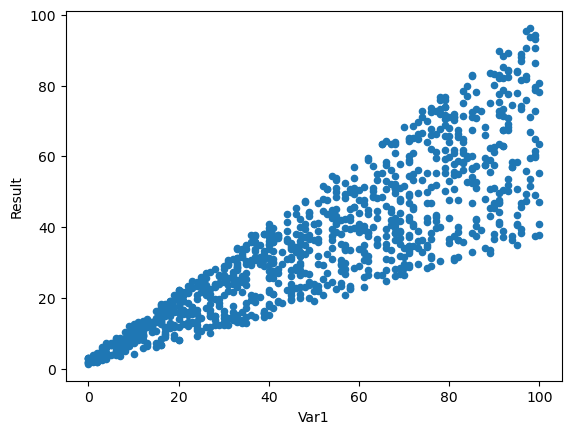

In [16]:
# We an also look at the correlation with scatter plots
df.plot.scatter(x = 'Var1', y = 'Result')

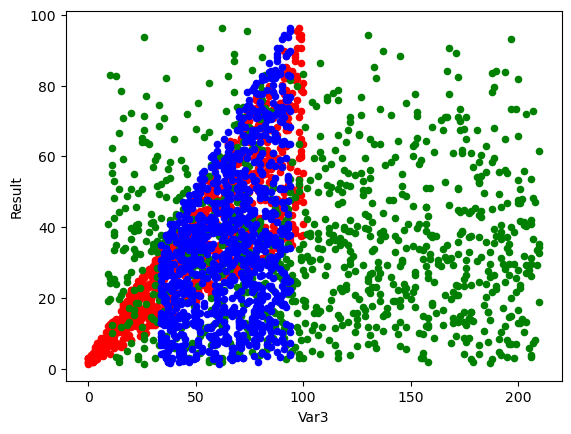

In [19]:
# Can also plot more columns together:
ax1 = df.plot(kind='scatter', x='Var1', y='Result', color='r')
ax2 = df.plot(kind='scatter', x='Var2', y='Result', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Var3', y='Result', color='b', ax=ax1)

In [25]:
# From the plot, it becomes apparent that different columns
# have different min/max values. To solve this we need to 
# scale the columns to a given interval. We can do this by importing sklearn and using preprocessing.MinMaxScaler()
x = df2.values #returns a numpy array
scaler = preprocessing.MinMaxScaler().fit(x)
x = scaler.transform(x)
df = pd.DataFrame(x)
df.head()
#To keep column names do
#df[list(df.columns)] = scaler.transform(df)
#instead of line 3 and 4
#But we want to just have a numeric id for now, since it will help us later.


,0,1,2,3,4,5,6
0,0.33,0.980100,0.883333,0.909091,0.333333,0.173913,0.316139
1,0.49,0.024876,0.866667,0.439394,0.000000,0.391304,0.452153
2,0.79,0.313433,0.933333,0.621212,0.166667,0.217391,0.764607
3,0.28,0.815920,0.250000,0.696970,0.000000,0.217391,0.143384
4,0.62,0.895522,0.966667,0.393939,0.166667,0.869565,0.613644


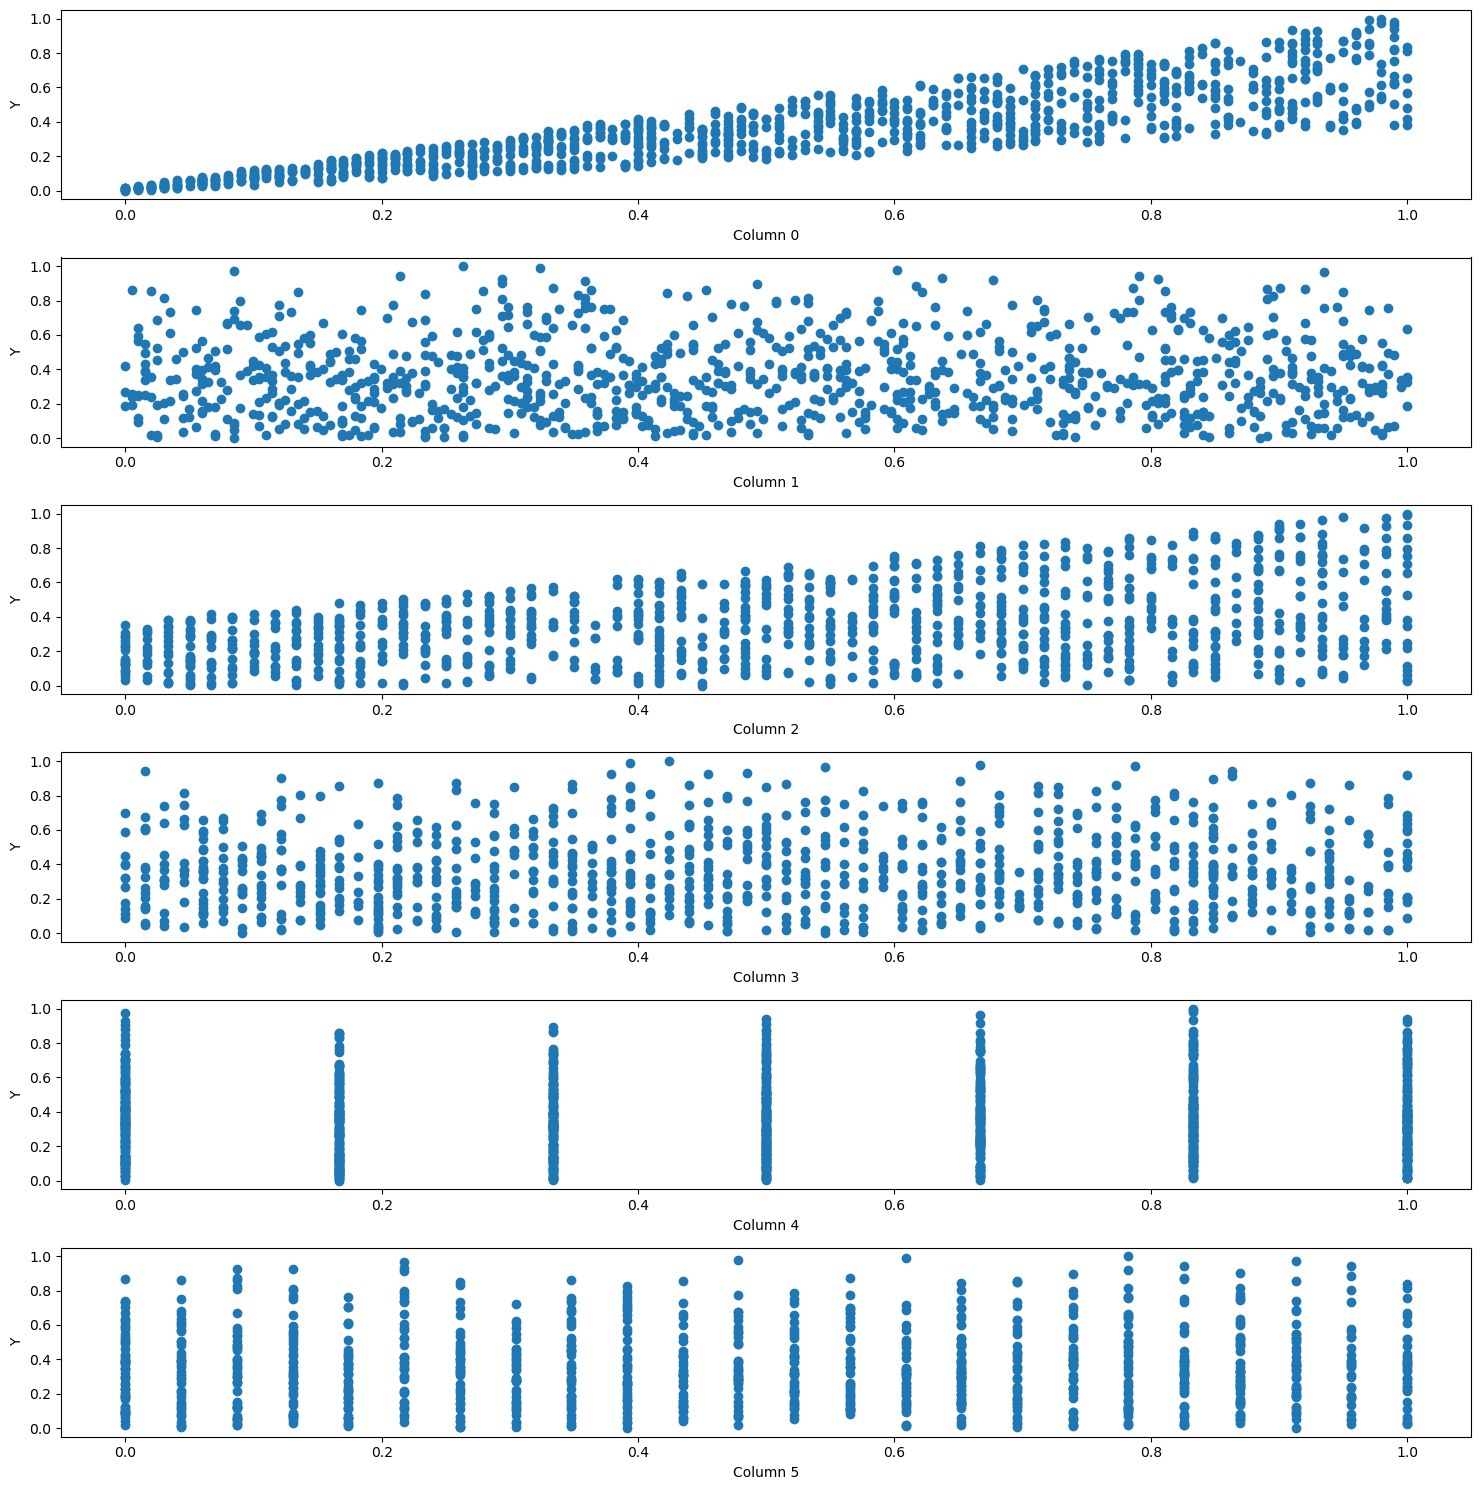

In [26]:
#Scatterplot all columns against last column
fig, ax = plt.subplots(df.shape[1]-1, figsize=(15, 15)) #Figsize ( length, height )
for i in range(df.shape[1]-1):   #This loop is why we wanted to keep column name numeric, and not keep original names
    
    ax[i].scatter(x = df[i], y = df[6])
    ax[i].set_xlabel("Column " + str(i))
    ax[i].set_ylabel("Y")
fig.tight_layout()
plt.show()